<a href="https://colab.research.google.com/github/rkp74/PCA/blob/main/RAJAN_KUMAR_CS_IT308_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab </center>
## <center> Lab#3 Principal component analysis (PCA) and Data generating process </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
from mpl_toolkits import mplot3d
from numpy.linalg import eig
import random

## <font color='red'> 1. Implement PCA for 2D Data.

In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $C=\begin{bmatrix}
1 & 2 \\
1 & 1 \end{bmatrix}$ and $D$ is the randomly generated matix using samples. <font>


Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# 2D Data for example
# Find X
C = np.array([[1, 2], [1, 1]])
D = np.random.rand(2, 200)
# matmul() function returns the matrix product of two arrays
X = np.matmul(C, D)

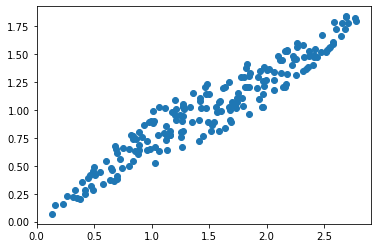

In [ ]:
# code to scatter plot X
plt.scatter(x = X[0, : ], y = X[1, : ])

### Implement PCA
Hint: refer class note

In [ ]:
# Write code to impement PCA
C_X = np.cov(X)
Eig_val, Eig_vec = np.linalg.eig(C_X)
idx = Eig_val.argsort()[::-1]   
E = Eig_val[idx]
P= Eig_vec[:,idx]
print('eigen values=',E)
print('eigen vectors= ')
print(P)

eigen values= [0.6132646 0.0107513]
eigen vectors= 
[[ 0.85778249 -0.51401284]
 [ 0.51401284  0.85778249]]


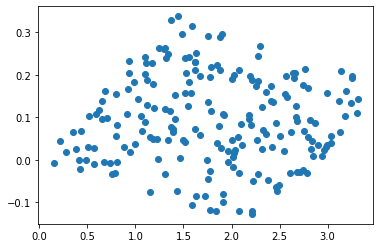

In [ ]:
# Transform data to new coordinates
P = P.T
Y = np.matmul(P, X)

# scatter plot Y
plt.scatter(x = Y[0, :], y = Y[1, :])

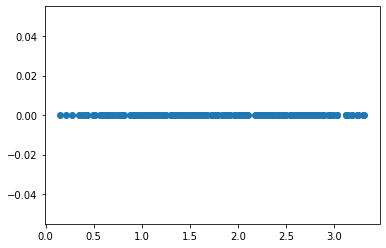

In [ ]:
#Approximate each 2-point data vector using one values
# Hint: Y[-1,:]=0

Y[-1, :]=0


# scatter plot Y
plt.scatter(x = Y[0, :], y = Y[1, :])

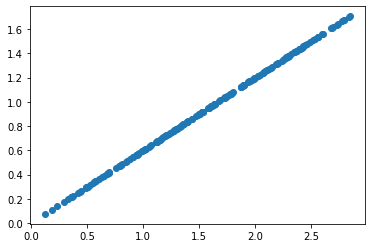

In [ ]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]

X_approx = PP * YY




# scatter plt X_approx
plt.scatter(x = X_approx[0,:], y = X_approx[1,:])

## <font color='red'> 2. Implement PCA for 3D Data.
In this experiment consider 200 samples and obtain the matrix $X$ in $X = C \times D$, where $$C=\begin{bmatrix}
1&2&-1\\
2&2&1\\
-2&0&2\\
\end{bmatrix}$$ and $D$ is the randomly generated matix using samples. <font>

Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
# Write 3D Data and find X
C = np.array([[1, 2,-1], [2, 2, 1], [-2, 0, 2]])
D = np.random.rand(3, 200)
# matmul() function returns the matrix product of two arrays
X = np.matmul(C, D)

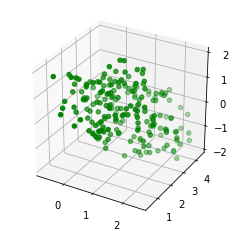

In [ ]:
# write code to scatter plot 3D
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")

ax.scatter3D(X[0, :], X[1, :], X[2, :], color = "green")

### Implement PCA
Hint: refer class note.

In [ ]:
#Write code here
C_X = np.cov(X)
Eig_val, Eig_vec = np.linalg.eig(C_X)
idx = Eig_val.argsort()[::-1]   
E = Eig_val[idx]
P= Eig_vec[:,idx]
print('eigen values=',E)
print('eigen vectors= ')
print(P)

eigen values= [1.21663388 0.54577635 0.12635914]
eigen vectors= 
[[ 0.59958958  0.0096484   0.80024949]
 [ 0.59864521  0.65822214 -0.45647292]
 [-0.53114616  0.75276193  0.38888716]]


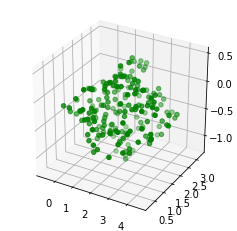

In [ ]:
# Transform data to new coordinates
P = P.T
Y = np.matmul(P, X)
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")

ax.scatter3D(Y[0, :], Y[1, :], Y[2, :], color = "green")



#Scatter plt Y

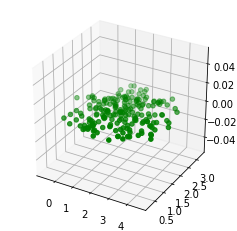

In [ ]:
#Approximate each 3-point data vector using two values
Y[2,:]=0
#Scatter plot Y
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")

ax.scatter3D(Y[0, :], Y[1, :], Y[2, :], color = "green")

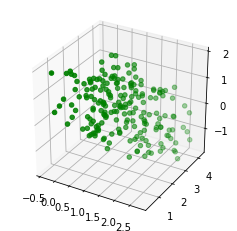

In [ ]:
#Transform back to original coordinates
PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
X_approx = np.matmul(PP, YY)

#Scatter plot X_approx
fig = plt.figure(figsize = (4, 4))
ax = plt.axes(projection ="3d")

ax.scatter3D(X_approx[0, :], X_approx[1, :], X_approx[2, :], color = "green")

## <font color='red'> 3. Implement PCA for image compression.<font> 
    Methodology: A set of face images is used to generate a basis matrix using PCA. Essentially this basis matrix would the input data which are correlated observations from the real world. By preserving different number of eigenvectors, different degrees of compression can be achieved.
    
    

You can use this link for face images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

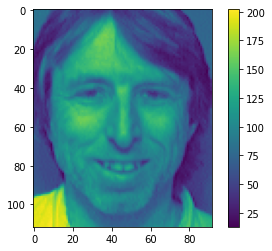

In [ ]:
a=glob.glob('*.pgm')
 # to read all images
X1 = mpimg.imread(a[0])
plt.imshow(X1)
plt.colorbar()
[m,n]=np.shape(X1)
X = X1.flatten()
X = np.zeros(shape=(np.size(a),m*n))
for i,j in zip(a,range(np.size(a))):
    X[j,:]=  mpimg.imread(i).flatten()

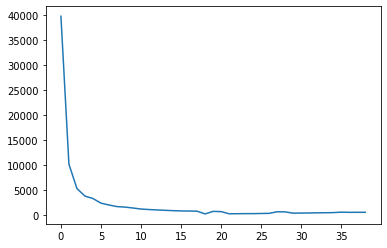

In [ ]:
#plot Eigen values of covariance matrix
cov = np.cov(X)
eval, evec = np.linalg.eig(cov)
index = eval.argsort()[::-1]
evec = evec[index]


plt.figure()
plt.plot(eval)

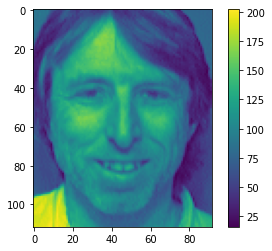

In [ ]:
#write code for PCA and approximate each data vector using few significant eigen values 
P = evec.T
Y = np.matmul(P, X)
Y[30,:]=0

PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
Xr = np.matmul(PP, YY)

X1r = np.reshape(Xr[0,:],[m,n])
plt.imshow(X1r)
plt.colorbar()


### <font color='red'> Homework: Implement PCA for remote sensing image.<font>
    Methodology: A set of remotely sensed images (Cuprite hyperspectral data having 188 bands) is used to generate a basis matrix based on PCA, and this matrix would be used to uncorrelate the data which are correlated. By preserving different number of eigenvectors different degrees of compression can be achieved. Find the variance of the input and output in each case and note the observations.

You can use this link for Cuprite images:

https://drive.google.com/file/d/1XMtBihZypbE-zlg_DuAW63IF4vX4cn3d/view?usp=sharing

In [ ]:
X = sio.loadmat('cuprite.mat')
X= X['x']
X1 = np.reshape(X,[188,191,250])
plt.figure()
plt.imshow(X1[1,:,:].T)
plt.colorbar()

OSError: ignored

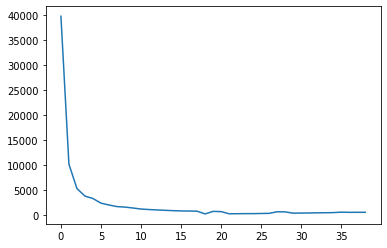

In [ ]:
#plot Eigen values of covariance matrix
cov = np.cov(X)
eval, evec = np.linalg.eig(cov)
index = eval.argsort()[::-1]
evec = evec[index]


plt.figure()
plt.plot(eval)

In [ ]:
#write code for PCA and approximate each data vector using few significant eigen values 
P = evec.T
Y = np.matmul(P, X)
Y[150,:]=0

PP = P.T
PP = PP[:,:-1]
YY = Y[:-1,:]
Xr = np.matmul(PP, YY)

X1 = np.reshape(Xr[0,:],[191,250])

plt.figure()
plt.imshow(X1.T)
plt.colorbar()

IndexError: ignored

## <font color='red'> 4. Data generating process: 
In this experiment take two zero mean, unit variance, uncorrelated Gaussian random variables. Obtain the transformation matrix $A$ in $Y = A \times X$ such that $Y$ has a specified covariance matrix. (Take any valid covariance matrix in this case)<font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity.
<br>
Hint for Code: Use np.linalg.eig, np.diag, np.matmul, np.cov

In [ ]:
#  For example use this Cy
Cy = np.array([[4 , 2],
               [2 , 4]])
print(Cy)

[[4 2]
 [2 4]]


In [ ]:
import math

def make(Cy):
    no_samples = 1000

    #Write code here
    data =  np.random.rand(2,1000) 
    print(data)

    C_x = np.cov(data)

    U,V = np.linalg.eig(Cy)
    print("eigen values ",U)
    print("eigen vectors \n",V)
    V=V.transpose()

#diag matrix

    sigma=np.array(())
    for i in U:
        sigma=np.append(sigma,math.sqrt(i))
        diagonal_matrix = np.diag(sigma)
    print(diagonal_matrix)

#find A
    A=np.dot(V,diagonal_matrix)


#new Cy
    acx=np.matmul(A,C_x)
    Cynew=np.matmul(acx,A.T)
    print("Cy_new=",Cynew)
    
# print("Cy_new=",Cynew)

In [ ]:
Cy = np.array([[4 , -3],
[-3 , 4]])
print(Cy)
make(Cy)

[[ 4 -3]
 [-3  4]]
[[0.58423903 0.36657858 0.12854229 ... 0.81803294 0.28414545 0.54025915]
 [0.17570341 0.28399211 0.418424   ... 0.41835555 0.1277913  0.96477592]]
eigen values  [7. 1.]
eigen vectors 
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
[[2.64575131 0.        ]
 [0.         1.        ]]
Cy_new= [[0.33319838 0.25305927]
 [0.25305927 0.34667599]]


### <font color='red'> Homework: Consider providing more valid covariance matrices and generate correlated random data using the reverse PCA operation done in Problem-4. This is an instance of data generating process useful in machine learning algorithms.